# Author: Abdullah Moosa 03/11/2024

#### **In this notebook the data will be applied on both the Categorical dataset and the Binary one(Dataset 1 and 2)**

##### This code uses the clustering technique Agglomerative Hierarchical Clustering, which is a popular form of hierarchical clustering that groups data points based on their similarity. this works  by treating each data point as an individual cluster. It then repeatedly merges the closest pairs of clusters based on the distance, until all points are merged into a single cluster. The common output is a dendrogram—a tree-like structure—that visually represents the merging process and allows for easy interpretation of the hierarchical relationships between clusters. This technique is particularly useful for uncovering nested groupings within data and analyzing the structure of complex datasets. This technique should allow for the Hierarchical comparision between datasets.




[A. Kassambara, “Agglomerative Hierarchical Clustering,” Datanovia. https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/]


[Abubakar Auwal Khalid, “Agglomerative Hierarchical Clustering: A Study and Implementation in Python,” Medium, Jun. 04, 2023. https://medium.com/@khalidassalafy/agglomerative-hierarchical-clustering-a-study-and-implementation-in-python-fddfdb6a7a64

## Importing Libraries 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.ipyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


# **Application on Dataset 1**

## Dataset loading, set up and evaluation

In [55]:
# files to different directories
file_paths = {
    '1_ef_b': r'Z:\\coursework\datasets\\1_binary\\processed\\1_ef_b.csv',
    '1_nrml_b': r'Z:\\coursework\datasets\\1_binary\\processed\\1_nrml_b.csv',
    '1_ef_ub': r'Z:\\coursework\datasets\\1_binary\\processed\\1_ef_ub.csv',
    '1_nrml_ub': r'Z:\\coursework\datasets\\1_binary\\processed\\1_nrml_ub.csv'
}

results = {}

# looping through each dataset file 
for label, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    true_labels = df['LUNG_CANCER'] #target coloumn
    df_numerical = df.drop(['LUNG_CANCER'], axis=1, errors='ignore')

    # Standardize the features for better clustering performance
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerical)

    # store metrics for each dataset's cluster number
    silhouette_scores = []
    davies_bouldin_scores = []
    cluster_range = range(2, 11)


    # loop through each number of cluster and apply agglomerative clustering

    for n_clusters in cluster_range:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = agglomerative.fit_predict(df_scaled)

        # calculate silhouette_score and davies bouldin score
        silhouette_scores.append(silhouette_score(df_scaled, labels))
        davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

    # store and find best metrics
    results[label] = {
        "Silhouette Scores": silhouette_scores,
        "Davies-Bouldin Scores": davies_bouldin_scores,
        "Best Silhouette Score": max(silhouette_scores),
        "Best Davies-Bouldin Index": min(davies_bouldin_scores),
        "Optimal Clusters (Silhouette)": cluster_range[np.argmax(silhouette_scores)],
        "Optimal Clusters (Davies-Bouldin)": cluster_range[np.argmin(davies_bouldin_scores)]
    }

 The main function of this code is to evaluate different datasets by applying Agglomerative Clustering and calculating two metrics: Silhouette Score and Davies Bouldin Index. For each variation of dataset 1, it loads the data, scales the features, and then loops through a range of cluster numbers (2 to 10) to compute the clustering metrics. The results, including optimal cluster counts based on the highest Silhouette Score and lowest Davies Bouldin Index, are stored in a dictionary for comparison. This process helps identify the best-performing variation of dataset 1 and optimal cluster count based on clustering quality.

## Visualizing Results of Evaluation

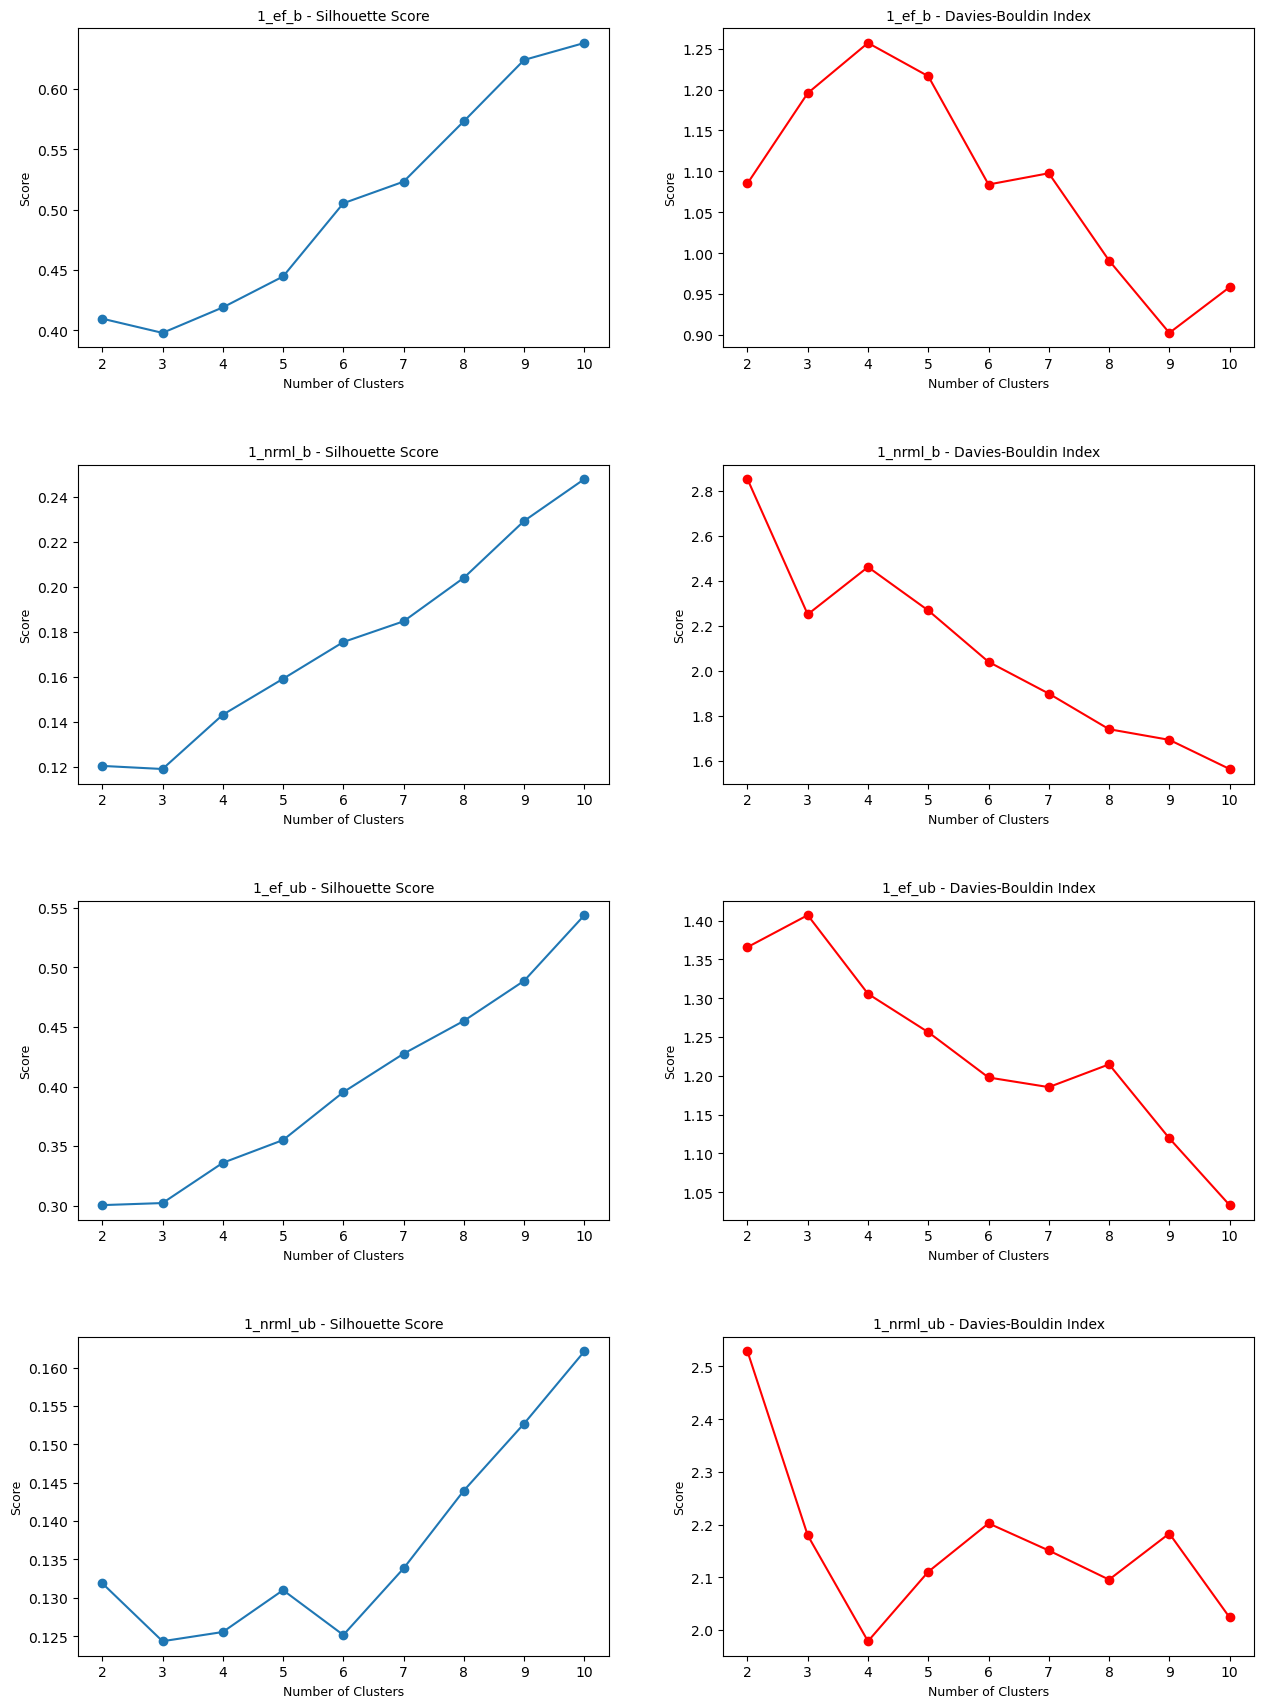


Dataset: 1_ef_b
Optimal number of clusters based on Silhouette Score: 10
Best Silhouette Score: 0.6380
Optimal number of clusters based on Davies-Bouldin Index: 9
Best Davies-Bouldin Index: 0.9025

Dataset: 1_nrml_b
Optimal number of clusters based on Silhouette Score: 10
Best Silhouette Score: 0.2480
Optimal number of clusters based on Davies-Bouldin Index: 10
Best Davies-Bouldin Index: 1.5647

Dataset: 1_ef_ub
Optimal number of clusters based on Silhouette Score: 10
Best Silhouette Score: 0.5438
Optimal number of clusters based on Davies-Bouldin Index: 10
Best Davies-Bouldin Index: 1.0332

Dataset: 1_nrml_ub
Optimal number of clusters based on Silhouette Score: 10
Best Silhouette Score: 0.1621
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies-Bouldin Index: 1.9789


In [41]:
plt.figure(figsize=(20, 18))

# loop through all dataset's clusters
for i, (label, metrics) in enumerate(results.items()):
    cluster_range = range(2, 11)
    
    #Plot Silhouette Scores
    plt.subplot(4, 3, i * 3 + 1)
    plt.plot(cluster_range, metrics["Silhouette Scores"], marker='o')
    plt.title(f"{label} - Silhouette Score", fontsize=10)
    plt.xlabel("Number of Clusters", fontsize=9)
    plt.ylabel("Score", fontsize=9)

    #Plot Davies-Bouldin Scores
    plt.subplot(4, 3, i * 3 + 2)
    plt.plot(cluster_range, metrics["Davies-Bouldin Scores"], marker='o', color='red')
    plt.title(f"{label} - Davies-Bouldin Index", fontsize=10)
    plt.xlabel("Number of Clusters", fontsize=9)
    plt.ylabel("Score", fontsize=9)

plt.tight_layout(pad=4)
plt.show()


# PRint best metric for each dataset
for label, metrics in results.items():
    print(f"\nDataset: {label}")
    print(f"Optimal number of clusters based on Silhouette Score: {metrics['Optimal Clusters (Silhouette)']}")
    print(f"Best Silhouette Score: {metrics['Best Silhouette Score']:.4f}")
    print(f"Optimal number of clusters based on Davies-Bouldin Index: {metrics['Optimal Clusters (Davies-Bouldin)']}")
    print(f"Best Davies-Bouldin Index: {metrics['Best Davies-Bouldin Index']:.4f}")


The results above indicate that the variation 1_ef_b (extracted features , balanced dataset) is the best dataset as expected due to its high Silhouette Score and low Davies Bouldin Score which was achieved via feature engineering and balancing of classes , these metrics indicate that it is the best dataset to use for this clustering method.

## Visualization of Dendogram

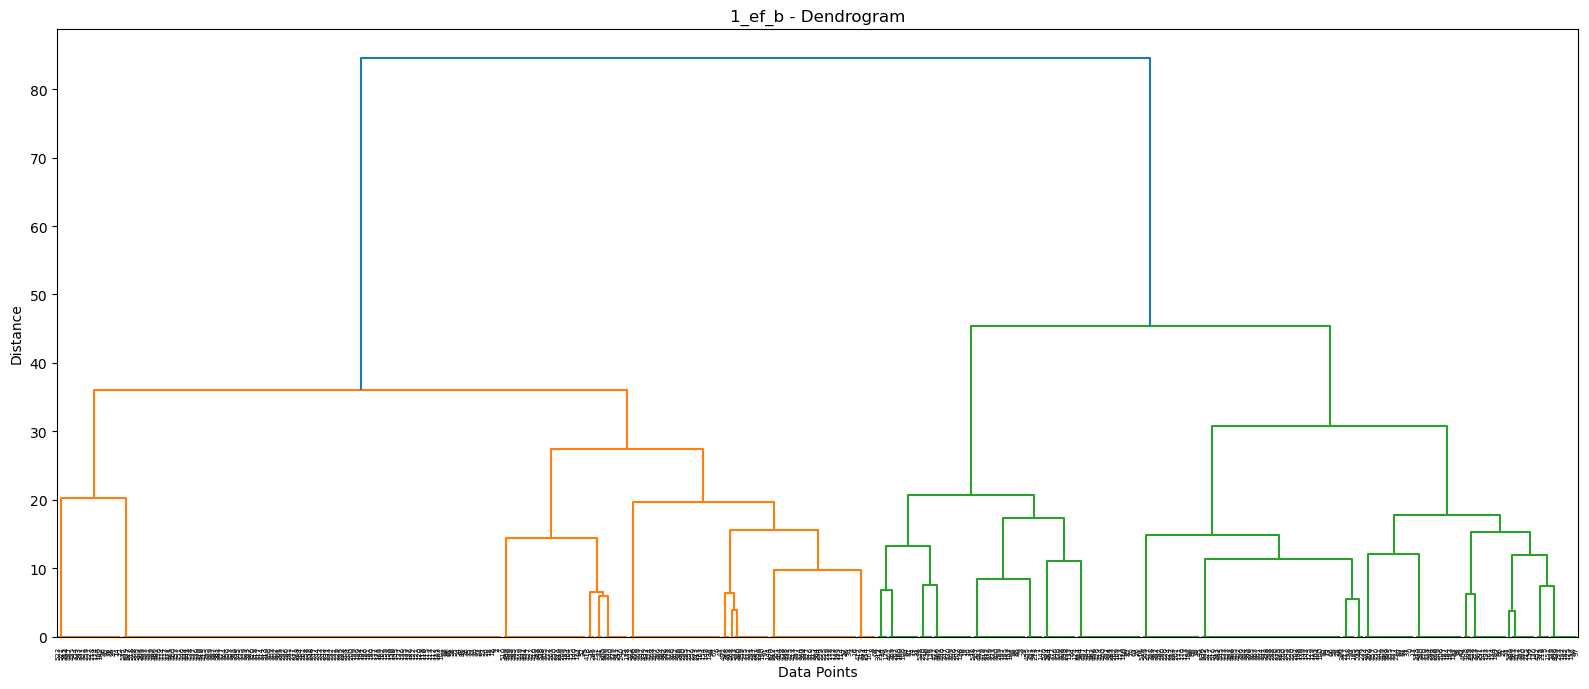

In [42]:
# Load the best performing dataset
df_1_ef_b = pd.read_csv(file_paths['1_ef_b'])
true_labels_1_ef_b = df_1_ef_b['LUNG_CANCER']
df_numerical_1_ef_b = df_1_ef_b.drop(['LUNG_CANCER'], axis=1, errors='ignore')

# Standardize the features for better clustering performance
scaler = StandardScaler()
df_scaled_1_ef_b = scaler.fit_transform(df_numerical_1_ef_b)

# Generate the Matrix for clustering with Ward's Method of grouping 

linkage_matrix_1_ef_b = linkage(df_scaled_1_ef_b, method='ward')



# Plot Dendogram

plt.figure(figsize=(16, 7))
dendrogram(linkage_matrix_1_ef_b)
plt.title('1_ef_b - Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


The code above visualizes the hierarchical clustering structure of 1_ef_b using a dendrogram. This diagram helps understand how data points are grouped based on similarity at different levels, providing future insight into other possible cluster separations. by looking at the diagram it could be understood how each cluster is related hierarchically  with other clusters (distance wise), in this diagram the clusters seem very distanced apart

## PCA visualization of Agglomerative clustering

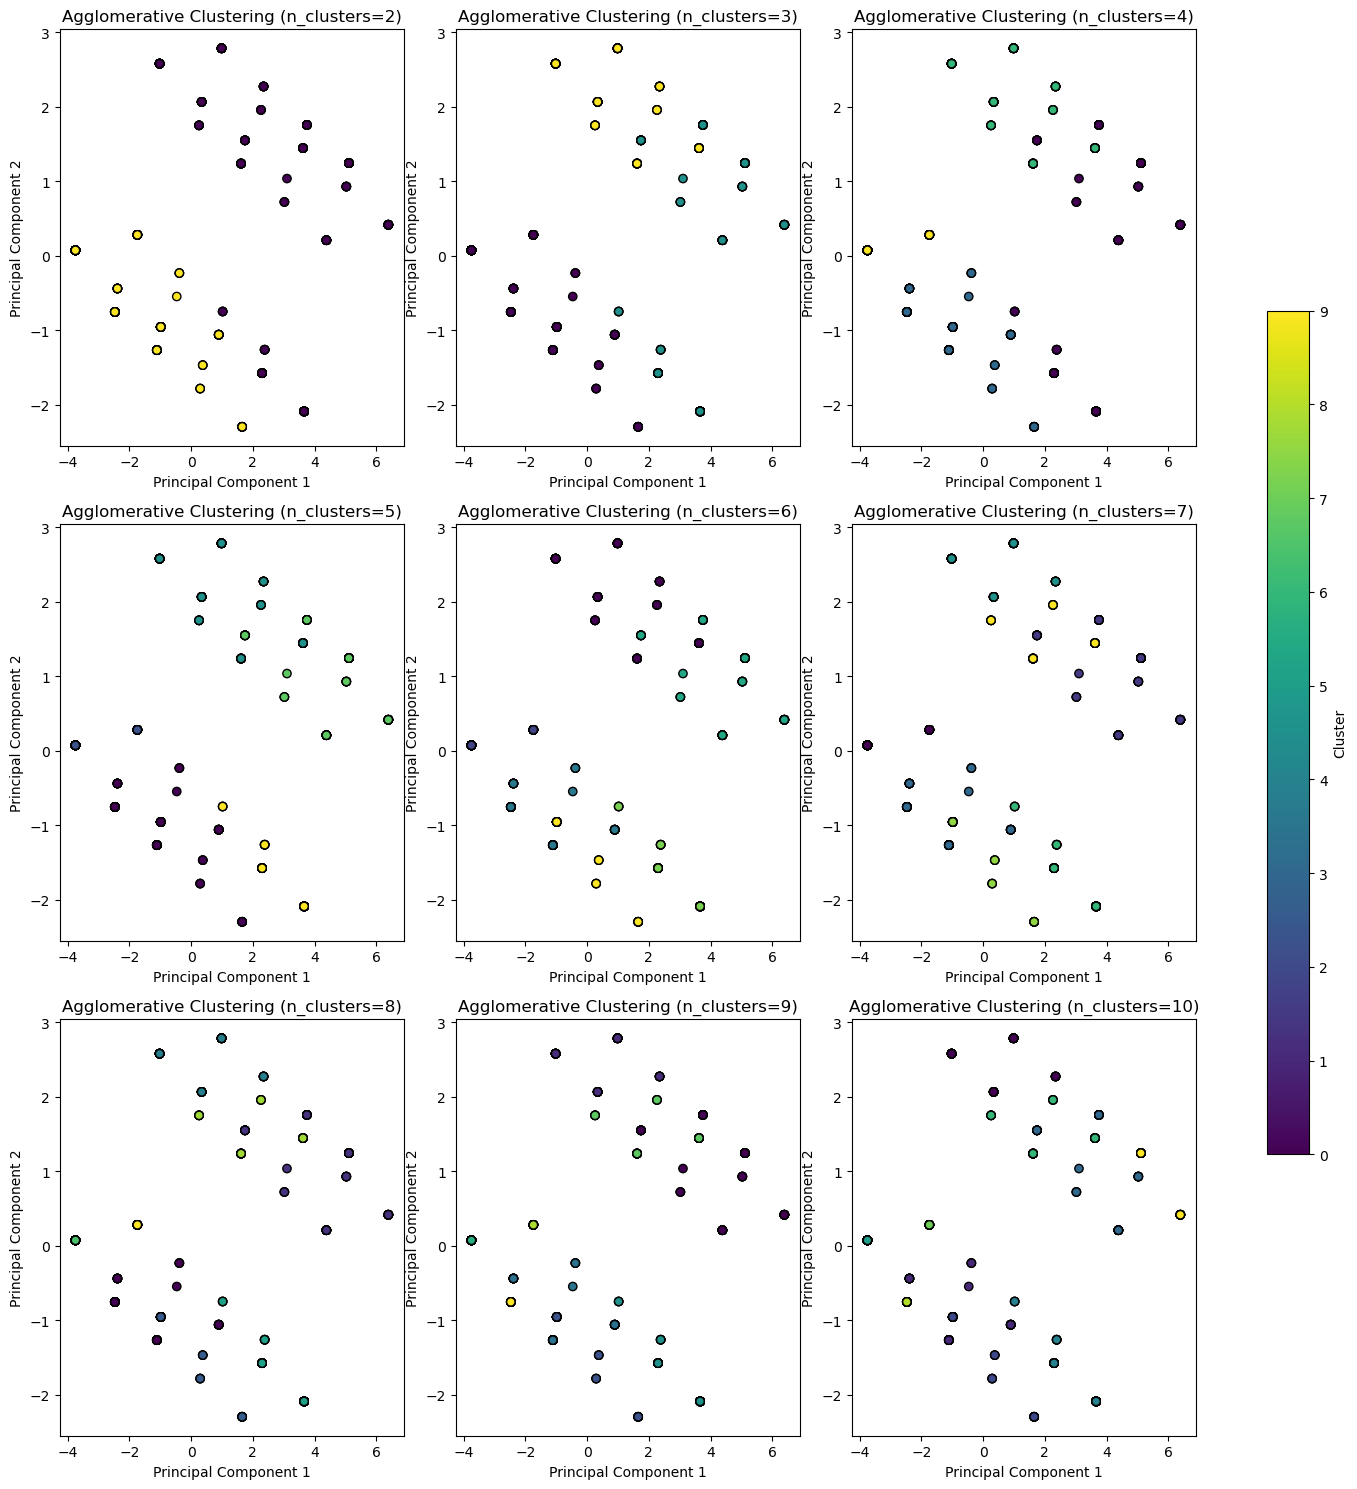

In [56]:
# Apply PCA using apply_pca function
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return data_pca

df_pca_1_ef_b = apply_pca(df_scaled_1_ef_b)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each number of clusters and plot the results of each cluster
for i, n_clusters in enumerate(cluster_range):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglomerative.fit_predict(df_scaled_1_ef_b)
    ax = axes[i]
    scatter = ax.scatter(df_pca_1_ef_b[:, 0], df_pca_1_ef_b[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    ax.set_title(f'Agglomerative Clustering (n_clusters={n_clusters})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')


plt.tight_layout()
plt.colorbar(scatter, ax=axes, location='right', shrink=0.6, label='Cluster')
plt.show()


The code above uses PCA to reduce the data to two dimensions from all the features of the dataset for easier viewing. The scatter plot shows the  clusters from 2 to 10 identified by Agglomerative Clustering. Each color represents a cluster, helping us see how they are separated. however the clusters here are not well seperated making it not linearly seperable, which indicates clustering for dataset 1 is an in effieient method and would probably require a more complex model to identify meaningful relationships

# **Application on Dataset 2**

## Dataset loading and set up

In [57]:
# Load both datasets
file_paths = {
    '2_nrml': 'Z:\\coursework\\datasets\\2_categorical\\processed\\2_nrml.csv',
    '2_og': 'Z:\\coursework\\datasets\\2_categorical\\processed\\2_og.csv'
}

datasets = {}

for label, path in file_paths.items():
    df = pd.read_csv(path)
    true_labels = df['Level']
    df_numerical = df.drop(['Level'], axis=1, errors='ignore') # Remove target column and unnecessary features


    # Standardize the features for better clustering performance
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerical)
    datasets[label] = {'df': df, 'true_labels': true_labels, 'scaled': df_scaled}


This loads two versions of the dataset given. The true label of the class "level" is extracted from the coloumn which could allow for comparing the clustering algorithm's accuracy Next, the DataFrame is created by dropping non-numeric and irrelevant columns (index, Patient Id, and Level). Removing these columns is essential for clustering since non-numeric columns can't be directly used in clustering.

## Evaluating best cluster Number

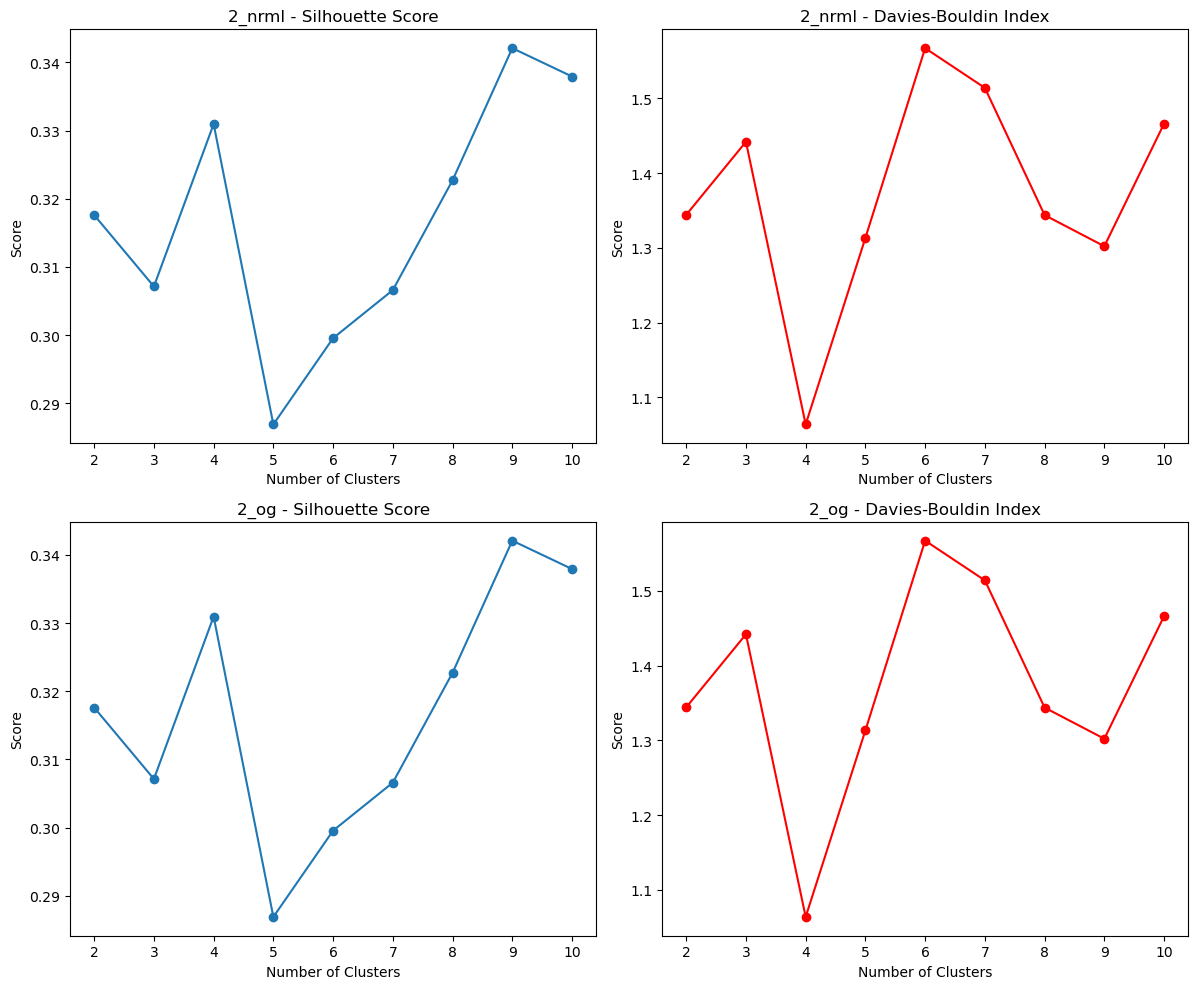


Dataset: 2_nrml
Optimal number of clusters based on Silhouette Score: 9
Best Silhouette Score: 0.3421

Dataset: 2_og
Optimal number of clusters based on Silhouette Score: 9
Best Silhouette Score: 0.3421

Dataset: 2_nrml
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies Bouldin Score: 1.0639

Dataset: 2_og
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies Bouldin Score: 1.0639


In [58]:
# store results
results = {}
cluster_range = range(2, 11)

# Loop through each dataset and calculate metrics
for label, data in datasets.items():
    df_scaled = data['scaled']
    silhouette_scores = []
    davies_bouldin_scores = []

    for n_clusters in cluster_range:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = agglomerative.fit_predict(df_scaled)
    
        # Calculate Silhouette Score and Davies-Bouldin Score
        silhouette_scores.append(silhouette_score(df_scaled, labels))
        davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))

    # Store results
    results[label] = {
        "Silhouette Scores": silhouette_scores,
        "Davies-Bouldin Scores": davies_bouldin_scores,
        "Optimal Clusters (Silhouette)": cluster_range[np.argmax(silhouette_scores)],
        "Optimal Clusters (davies)": cluster_range[np.argmin(davies_bouldin_scores)],
        "Best Silhouette Score": max(silhouette_scores),
        "Best Davies Bouldin Score": min(davies_bouldin_scores)
    }

plt.figure(figsize=(18, 10))
for i, (label, metrics) in enumerate(results.items()):

    # Plot Silhouette Scores
    plt.subplot(2, 3, i * 3 + 1)
    plt.plot(cluster_range, metrics["Silhouette Scores"], marker='o')
    plt.title(f"{label} - Silhouette Score")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")

    # Plot Davies-Bouldin Scores
    plt.subplot(2, 3, i * 3 + 2)
    plt.plot(cluster_range, metrics["Davies-Bouldin Scores"], marker='o', color='red')
    plt.title(f"{label} - Davies-Bouldin Index")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

# Print the best Silhouette Score
for label, metrics in results.items():
    print(f"\nDataset: {label}")
    print(f"Optimal number of clusters based on Silhouette Score: {metrics['Optimal Clusters (Silhouette)']}")
    print(f"Best Silhouette Score: {metrics['Best Silhouette Score']:.4f}")



for label, metrics in results.items():
    print(f"\nDataset: {label}")
    print(f"Optimal number of clusters based on Davies-Bouldin Index: {metrics['Optimal Clusters (davies)']}")
    print(f"Best Davies Bouldin Score: {metrics['Best Davies Bouldin Score']:.4f}")
    
    




The code above evaluates different numbers of clusters on both  types of dataset  to find the best optimal number of clusters that fits this dataset by applying agglomerative Hierarchical clustering, the value metrics shown above in the graphs are silhoutte score and Davies-Bouldin Index. It is shown that the cluster number 4 is the best because:

** It has a high silhoutte score, which shows that the values are seperated well so it has well defined clusters


** It has the lowest Davies-Bouldin Index , which shows that the clusters are compact and seperated



it is worth mentioning that both dataset will output the same result (concluded after this experiment)

## Dendogram Visualization

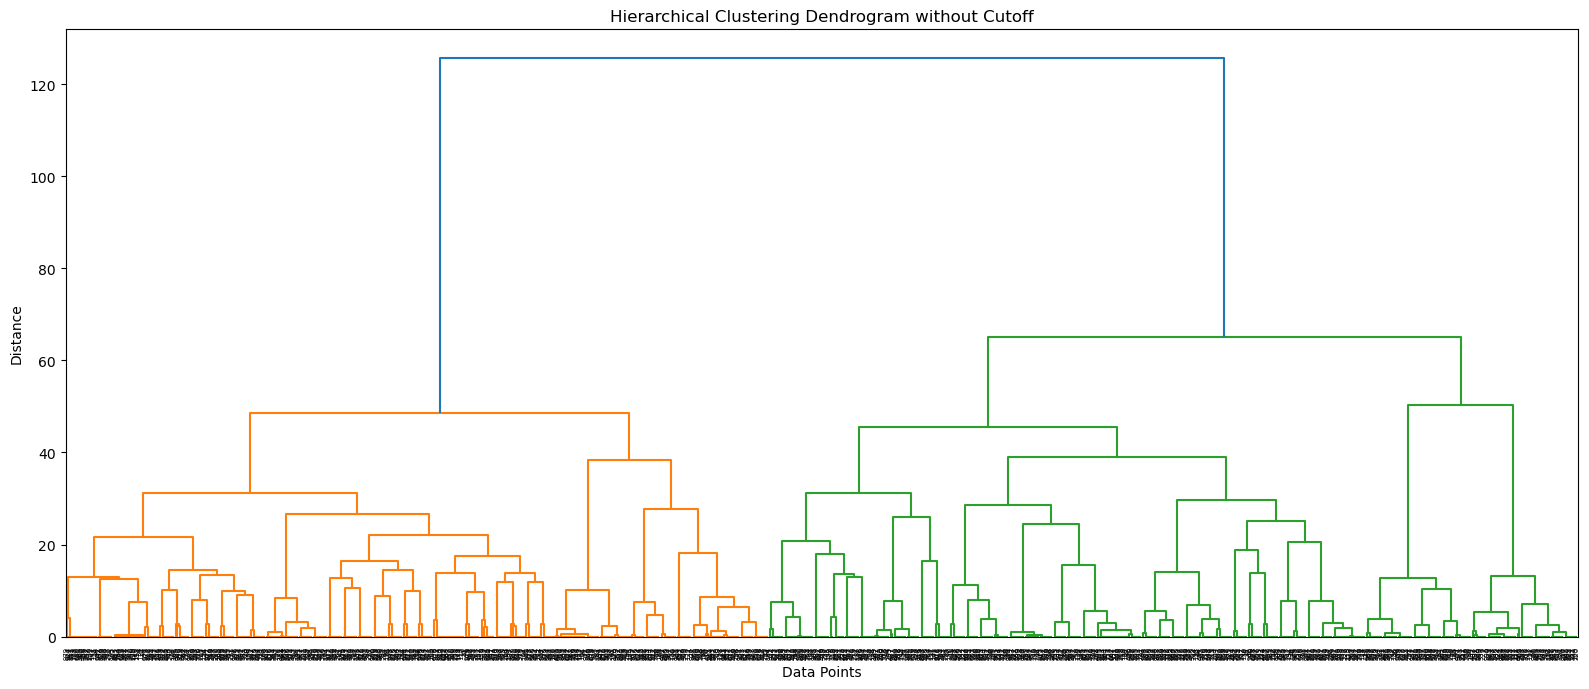

In [59]:
# Generate Linkage Matrix for Hierarchical Clustering using Ward's Method

linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(16, 7))

# Plot Dendogram 1
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram without Cutoff')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

The code above visualizes the hierarchical clustering structure of the dataset using a dendrogram. This diagram helps understand how data points are grouped based on similarity at different levels, providing future insight into other possible cluster separations. by looking at the diagram it could be understood how each cluster is related hierarchically  with other clusters (distance wise). It appears here that the dendogram is narrower indicating the clusters could be perfoming better on this dataset

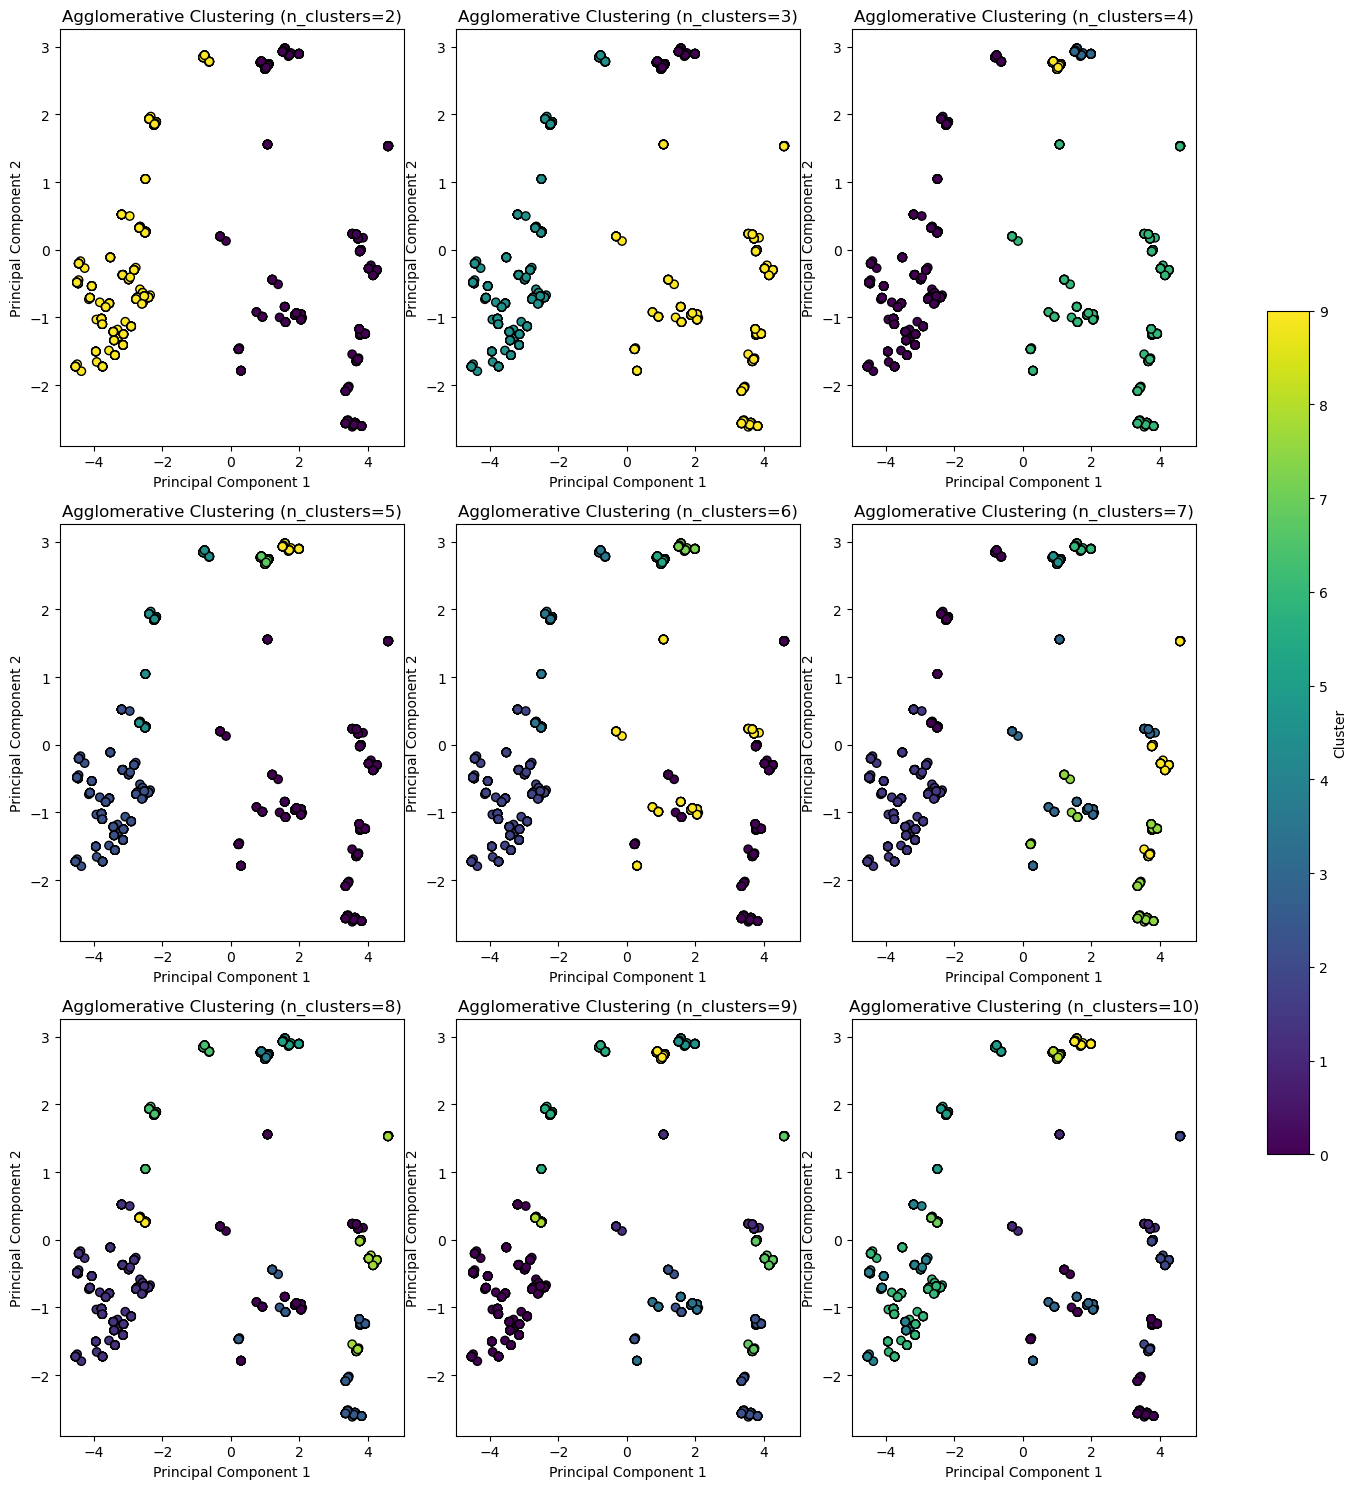

In [60]:
# Apply PCA using apply_pca function
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(data)
    return df_pca

df_pca = apply_pca(df_scaled)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Loop through each number of clusters and plot the results of each cluster
for i, n_clusters in enumerate(cluster_range):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglomerative.fit_predict(df_scaled)
    ax = axes[i]
    scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    ax.set_title(f'Agglomerative Clustering (n_clusters={n_clusters})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')


plt.tight_layout()
plt.colorbar(scatter, ax=axes, location='right', shrink=0.6, label='Cluster')
plt.show()

The code above uses PCA to reduce the data to two dimensions for easier viewing. The scatter plot shows the clusters identified by Agglomerative Clustering. Each color represents a cluster, helping us see how they are separated. As expected and shown in the dendogram analysis the data is more clustered in this dataset and cluster 4 seems to still be the optimal number of cluster as the data looks to be fairly linear seperable

## Confusion Matrix

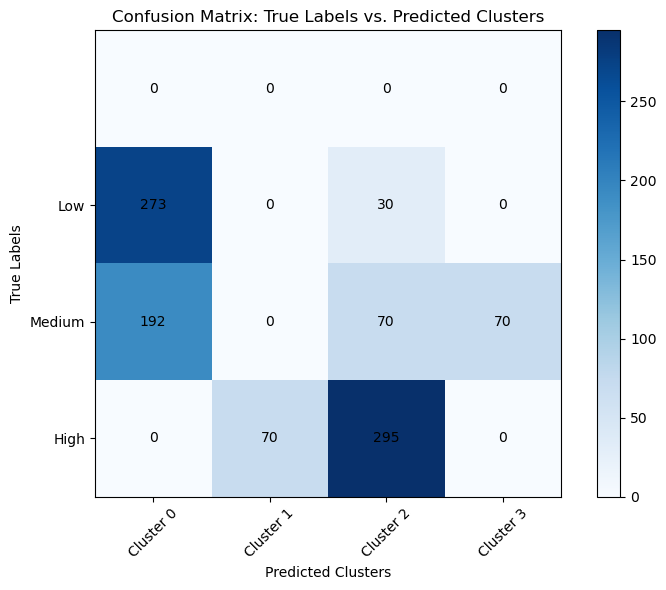

In [53]:
# Load Dataset
file_path = r'Z:\\coursework\\datasets\\2_categorical\\processed\\2_og.csv'
df = pd.read_csv(file_path)
true_labels = df['Level']  # Contains 1 for Low, 2 for Medium, and 3 for High

# Apply Agglomerative Clustering on the Optimal Cluster Number
optimal_clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels = agglomerative.fit_predict(df_scaled)
df['Cluster'] = final_labels
df[['Cluster']].head(10)

# Generate confusion matrix to compare true labels with clusters
cm = confusion_matrix(true_labels, final_labels)
cluster_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
true_class_labels = ['Low', 'Medium', 'High']  # Corresponding labels for 1, 2, 3

# Generate Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs. Predicted Clusters")
plt.colorbar()
plt.xticks(np.arange(optimal_clusters), cluster_labels, rotation=45)
plt.yticks([1, 2, 3], true_class_labels)  # Adjusted y-axis labels for true class
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


The confusion matrix shows how each predicted cluster matches the original categories: Low, Medium, and High (which was removed for clustering). Cluster 0 mostly contains Low cases, and Cluster 2 mostly captures High cases. Medium cases are spread across multiple clusters. This chart helps us see if clustering can act like an unsperivsed classification tool by comparing clusters with actual categories. The results show a partial match however it is not a definitive metric 

# **Summary**

Dataset 1 (Categorical): The best variation (1_ef_b) achieved optimal clustering with extracted features and balanced data using Silhouette Score and Davies Bouldin Index. Visualization using dendrograms and PCA showed almost no separation of clusters.

Dataset 2 (Binary): This dataset showed best clustering at 4 clusters using Silhouette Score and Davies Bouldin Index , using both datasets. PCA revealed better cluster separation compared to Dataset 1, and the confusion matrix highlighted the inability to perfectly match true labels with clusters but achieved overall better results



The notebook focuses on the importance of preprocessing, optimal cluster number identification, and dimensionality reduction in clustering tasks. These steps are crucial for effectively leveraging clustering as an unsupervised learning tool for initial data structure insights and for refining supervised learning tasks. ​